In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path  = r'..\..\data\titanic_train.csv'

In [8]:
df = pd.read_csv(path)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Outlier Imputation

In [30]:
df_1 = df.copy()

In [31]:
df_1['Age'].quantile(0.25)

20.125

In [32]:
for age in df_1.Age:
    q1 = df_1['Age'].quantile(0.25)
    q3 = df_1['Age'].quantile(0.75)
    iqr = q3 - q1
    
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    
    # print('q1 : ', q1)
    # print('q3 : ' , q3)
    # print('iqr : ', iqr)
    # print('lower : ', lower_tail)
    # print('higher : ', upper_tail)
    
    if age < lower_tail or age > upper_tail:
       df_1['Age'] = df_1['Age'].replace(age, np.median(df_1['Age']))
    # print(iqr)
    # break
    
print('Done !')

Done !


## np.median() distribution plot

C:\Users\595244\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

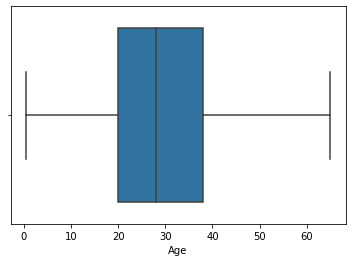

In [33]:
sns.boxplot(df_1.Age)

C:\Users\595244\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

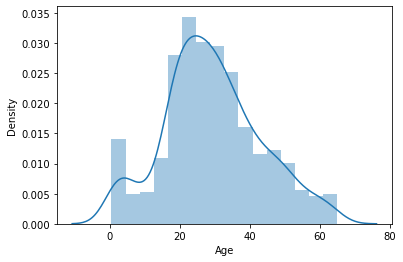

In [34]:
sns.distplot(df_1.Age)

## np.mean() distribution plot

C:\Users\595244\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

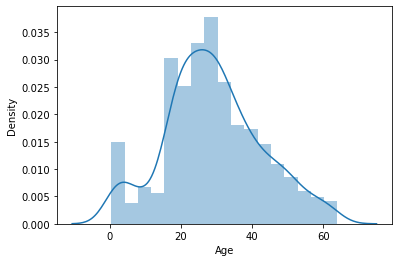

In [22]:
sns.distplot(df_1.Age)

In [24]:
df_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

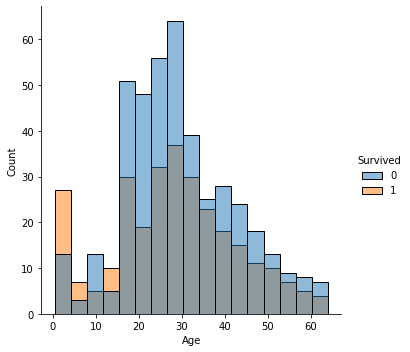

In [29]:
sns.displot(df_1, x='Age', hue='Survived')